# Import modules

In [1]:
from Model import *
from utilities import *
from  sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import preprocessing
from scipy.stats import entropy
import torch.utils.data as Data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import utils
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optimizer
import warnings
warnings.filterwarnings("ignore")

C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\phoen\Anaconda3\envs\pytorch\lib\site-packages\tensorflow\

# Building the dataset

In [2]:
def get_dat(data_num):
    if data_num == 1:
        F_0 = np.load("./bearingset/data/T1_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T1_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T1_source_label.npy")
        Y_1 = np.load("./bearingset/data/T1_target_label.npy")
        Label_Name =["1-OSF","2-OSP","3-ORF","4-ISF","6-IORF","7-IORP","8-H","Unknown"]
    if data_num == 2:
        F_0 = np.load("./bearingset/data/T2_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T2_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T2_source_label.npy")
        Y_1 = np.load("./bearingset/data/T2_target_label.npy")
        Label_Name =["1-OSF","3-ORF","4-ISF","6-IORF","7-IORP","8-H","Unknown"]
    if data_num == 3:
        F_0 = np.load("./bearingset/data/T3_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T3_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T3_source_label.npy")
        Y_1 = np.load("./bearingset/data/T3_target_label.npy")
        Label_Name =["1-OSF","2-OSP","3-ORF","4-ISF","5-IRF","Unknown"]
    if data_num == 4:
        F_0 = np.load("./bearingset/data/T4_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./bearingset/data/T4_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./bearingset/data/T4_source_label.npy")
        Y_1 = np.load("./bearingset/data/T4_target_label.npy")
        Label_Name =["1-OSF","4-ISF","6-IORF","8-H","Unknown"]
    if data_num == 5:
        F_0 = np.load("./gearset/data/T1_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./gearset/data/T1_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./gearset/data/T1_source_label.npy")
        Y_1 = np.load("./gearset/data/T1_target_label.npy")
        Label_Name =["1-N","3-BF&SI","4-G&E","Unknown"]
    if data_num == 6:
        F_0 = np.load("./gearset/data/T2_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./gearset/data/T2_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./gearset/data/T2_source_label.npy")
        Y_1 = np.load("./gearset/data/T2_target_label.npy")
        Label_Name =["1-N","3-BF&SI","4-G&E","Unknown"]
    if data_num == 7:
        F_0 = np.load("./gearset/data/T3_source_image.npy").transpose((0,3,1,2))/255
        F_1 = np.load("./gearset/data/T3_target_image.npy").transpose((0,3,1,2))/255
        Y_0 = np.load("./gearset/data/T3_source_label.npy")
        Y_1 = np.load("./gearset/data/T3_target_label.npy")
        Label_Name =["1-N","3-BF&SI","4-G&E","Unknown"]
    F_0=torch.from_numpy(F_0.astype(np.float32))
    F_1=torch.from_numpy(F_1.astype(np.float32))
    Y_0=torch.from_numpy(Y_0.astype(np.float32))
    Y_1=torch.from_numpy(Y_1.astype(np.float32))
    data_0 = Data.TensorDataset(F_0,Y_0)
    data_1 = Data.TensorDataset(F_1,Y_1)
    return data_0,data_1,F_0,F_1,Y_0,Y_1,Label_Name
def Split(full_dataset):
    test_size = 200
    train_size = len(full_dataset) - test_size
    train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
    return train_dataset, test_dataset

# Model 

## Model defination

In [3]:
def cal_consist(pre1,pre2,pre3,pre4,pre5):
    consist = np.zeros(pre1.shape)
    p1 = pre1.cpu().detach().numpy()
    p2 = pre2.cpu().detach().numpy()
    p3 = pre3.cpu().detach().numpy()
    p4 = pre4.cpu().detach().numpy()
    p5 = pre5.cpu().detach().numpy()
    for i in range(pre1.shape[1]):
        for j in range(pre1.shape[0]):
            consist[j,i] = np.std([p1[j,i],p2[j,i],p3[j,i],p4[j,i],p5[j,i]])
    return consist
def step_1(source_loader, target_loader,net,G_D,data_num):
    step = 0
    acc = 0
    while step <150:
        for (i, ((im_source, label_source), (im_target, label_target))) in enumerate (zip(source_loader, target_loader)):
            fs1, feature_source, predict_prob_source = net.forward(im_source.cuda())
            ft1, feature_target, predict_prob_target = net.forward(im_target.cuda())
            coarse_source = G_D.forward(fs1)
            coarse_target = G_D.forward(ft1)
            c1_s = G_C1.forward(fs1)
            c1_t = G_C1.forward(ft1)            
            c2_s = G_C2.forward(fs1)
            c2_t = G_C2.forward(ft1)                
            c3_s = G_C3.forward(fs1)
            c3_t = G_C3.forward(ft1)               
            c4_s = G_C4.forward(fs1)
            c4_t = G_C4.forward(ft1)                
            c5_s = G_C5.forward(fs1)
            c5_t = G_C5.forward(ft1)                
            # =========================loss function
            ce = CrossEntropyLoss(label_source.cuda(), predict_prob_source.cuda())
            d1 = BCELossForMultiClassification(label_source[:,0:num_class].cuda(),coarse_source.cuda())
            c1 = BCELossForMultiClassification(label_source[:,0:num_class].cuda(),c1_s.cuda())
            c2 = BCELossForMultiClassification(label_source[:,0:num_class].cuda(),c2_s.cuda())
            c3 = BCELossForMultiClassification(label_source[:,0:num_class].cuda(),c3_s.cuda())
            c4 = BCELossForMultiClassification(label_source[:,0:num_class].cuda(),c4_s.cuda())
            c5 = BCELossForMultiClassification(label_source[:,0:num_class].cuda(),c5_s.cuda())
            with OptimizerManager([optimizer_G_F,optimizer_G_C,optimizer_G_D,
                                   optimizer_G_C1,optimizer_G_C2,optimizer_G_C3,optimizer_G_C4,optimizer_G_C5]):
                loss = ce + d1 + c1 + c2 + c3 + c4 + c5  
                loss.backward()
            step += 1
            if step % 10 == 1:
                acc_test = accuracy_score(np.argmax(predict_prob_target.cpu().detach().numpy(),axis = -1),
                                          np.argmax(label_target.cpu().detach().numpy(),axis = -1))
                if acc_test>=acc:
                    acc = acc_test
                    torch.save(net.state_dict(), './models/Compared_Methods_CMU_net.pkl')
                    torch.save(G_D.state_dict(), './models/Compared_Methods_CMU_D.pkl')
                    torch.save(G_F.state_dict(), './models/Compared_Methods_CMU_F.pkl')
                    torch.save(G_C1.state_dict(), './models/Compared_Methods_CMU_C1.pkl')
                    torch.save(G_C2.state_dict(),  './models/Compared_Methods_CMU_C2.pkl')
                    torch.save(G_C3.state_dict(),  './models/Compared_Methods_CMU_C3.pkl')
                    torch.save(G_C4.state_dict(), './models/Compared_Methods_CMU_C4.pkl')
                    torch.save(G_C5.state_dict(),  './models/Compared_Methods_CMU_C5.pkl')
                    best_net_path = './models/Compared_Methods_CMU_net.pkl'
                    best_G_D_path = './models/Compared_Methods_CMU_D.pkl'
                    best_G_C1_path = './models/Compared_Methods_CMU_C1.pkl'
                    best_G_C2_path = './models/Compared_Methods_CMU_C2.pkl'
                    best_G_C3_path = './models/Compared_Methods_CMU_C3.pkl'
                    best_G_C4_path = './models/Compared_Methods_CMU_C4.pkl'
                    best_G_C5_path = './models/Compared_Methods_CMU_C5.pkl'
    return best_net_path,best_G_D_path,best_G_C1_path,best_G_C2_path,best_G_C3_path,best_G_C4_path,best_G_C5_path

def step_2(best_net_path,best_G_D_path,best_G_C1_path,best_G_C2_path,best_G_C3_path,best_G_C4_path,best_G_C5_path,batch,source_loader,target_loader,data_num):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net.load_state_dict(torch.load(best_net_path))
    G_D.load_state_dict(torch.load(best_G_D_path))
    G_C1.load_state_dict(torch.load(best_G_C1_path))
    G_C2.load_state_dict(torch.load(best_G_C2_path))
    G_C3.load_state_dict(torch.load(best_G_C3_path))
    G_C4.load_state_dict(torch.load(best_G_C4_path))
    G_C5.load_state_dict(torch.load(best_G_C5_path))
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    k=0
    acc = 0
    minibatch = 10
    while k <20:
        for (i, ((im_source, label_source), (im_target, label_target))) in enumerate (zip(source_loader, target_loader)):        
            fs1, feature_source, predict_prob_source = net.forward(im_source.cuda())
            ft1, feature_target, predict_prob_target = net.forward(im_target.cuda())
            pred= G_D.forward(ft1)
            pre1= G_C1.forward(ft1)
            pre2= G_C1.forward(ft1)
            pre3= G_C1.forward(ft1)
            pre4= G_C1.forward(ft1)
            pre5= G_C1.forward(ft1)
    # Confidence term 
            p1_confidence = torch.max(pred,axis = 1).values
            w1_norm = (p1_confidence - torch.min(p1_confidence))/(torch.max(p1_confidence)-torch.min(p1_confidence)+1e-4)
    # Entropy term
            p1_entropy = entropy(pred.cpu().detach().numpy(),axis = 1)
            p1_entropy = torch.tensor(p1_entropy)
            w2_norm = 1 - ((p1_entropy - torch.min(p1_entropy))/(torch.max(p1_entropy)-torch.min(p1_entropy)+1e-4))
    # Consistency term 
            consist = cal_consist(pre1,pre2,pre3,pre4,pre5)
            cons = np.mean(consist,axis =1) 
            cons = torch.tensor(cons)
            w3_norm = 1-((cons - torch.min(cons))/(torch.max(cons)-torch.min(cons)+1e-4))
            cmu = (w1_norm.to(device) + w2_norm.to(device) + w3_norm.to(device))/3
            minibatch = torch.sum(cmu<0.5).item()        
            domain_prob_discriminator_1_source = D.forward(fs1)
            domain_prob_discriminator_1_target = D.forward(ft1)
            known = torch.sort(torch.tensor(cmu).cuda().detach(),dim = 0)[1][minibatch:]
            unknown = torch.sort(torch.tensor(cmu).cuda().detach(),dim = 0)[1][0:minibatch]
            feature_unknown = torch.index_select(ft1, 0, unknown)
            _, __, predict_prob_otherep = G_C.forward(feature_unknown)
            ce = CrossEntropyLoss(label_source.cuda(), predict_prob_source.cuda())
            ce_ep = CrossEntropyLoss(Variable(torch.from_numpy(np.concatenate((np.zeros((minibatch,num_class)), np.ones((minibatch,1))), axis = -1).astype('float32'))).cuda(),predict_prob_otherep)
            adv_loss = BCELossForMultiClassification(label=torch.ones_like(domain_prob_discriminator_1_source), predict_prob=domain_prob_discriminator_1_source )
            adv_loss += BCELossForMultiClassification(label=torch.ones_like(domain_prob_discriminator_1_target), predict_prob=1 - domain_prob_discriminator_1_target, instance_level_weight =cmu)
            with OptimizerManager([optimizer_G_C,optimizer_G_F,optimizer_D,optimizer_G_D,
                                   optimizer_G_C1,optimizer_G_C2,optimizer_G_C3,optimizer_G_C4,optimizer_G_C5]):
                loss =  ce +  0.1*adv_loss + 0.1* ce_ep
                loss.backward()
            acc_test = accuracy_score(np.argmax(predict_prob_target.cpu().detach().numpy(),axis = -1),
                                      np.argmax(label_target.cpu().detach().numpy(),axis = -1))
            if acc_test>=acc:
                acc = acc_test            
                torch.save(net.state_dict(), './models/Compared_Methods_CMU_net.pkl')
                torch.save(G_D.state_dict(), './models/Compared_Methods_CMU_D.pkl')
                torch.save(G_C1.state_dict(), './models/Compared_Methods_CMU_C1.pkl')
                torch.save(G_C2.state_dict(),  './models/Compared_Methods_CMU_C2.pkl')
                torch.save(G_C3.state_dict(),  './models/Compared_Methods_CMU_C3.pkl')
                torch.save(G_C4.state_dict(), './models/Compared_Methods_CMU_C4.pkl')
                torch.save(G_C5.state_dict(),  './models/Compared_Methods_CMU_C5.pkl')
                net_path = './models/Compared_Methods_CMU_net.pkl'
                G_D_path = './models/Compared_Methods_CMU_D.pkl'
                G_C1_path = './models/Compared_Methods_CMU_C1.pkl'
                G_C2_path = './models/Compared_Methods_CMU_C2.pkl'
                G_C3_path = './models/Compared_Methods_CMU_C3.pkl'
                G_C4_path = './models/Compared_Methods_CMU_C4.pkl'
                G_C5_path = './models/Compared_Methods_CMU_C5.pkl'          
        k += 1
    return net_path,G_D_path,G_C1_path,G_C2_path,G_C3_path,G_C4_path,G_C5_path    

## Model initialization

In [4]:
data_num = 1
data_0,data_1,F_0,F_1,Y_0,Y_1,Label_Name = get_dat(data_num)
Train_0,Test_0 = Split(data_0)
Train_1,Test_1 = Split(data_1)
source_loader=Data.DataLoader(dataset=Train_0,batch_size=40,shuffle=True,num_workers=0)
target_loader=Data.DataLoader(dataset=Train_1,batch_size=40,shuffle=True,num_workers=0)
source_loader1=Data.DataLoader(dataset=Test_0,batch_size=40,shuffle=True,num_workers=0)
target_loader1=Data.DataLoader(dataset=Test_1,batch_size=40,shuffle=True,num_workers=0)
num_class = Y_0.shape[1]-1


# Entropy and Confidence
G_D = Discriminator(n = num_class).cuda()
# Classifier 
G_F = CNN_2D().cuda()
G_C= CLS(1024, Y_0.shape[1]).cuda()
net = nn.Sequential(G_F, G_C).cuda()
# Consistensy
G_C1= Discriminator_1(n = num_class).cuda()
G_C2= Discriminator_2(n = num_class).cuda()
G_C3= Discriminator_3(n = num_class).cuda()
G_C4= Discriminator_4(n = num_class).cuda()
G_C5= Discriminator_5(n = num_class).cuda()
# Domain adaptation
D = LargeAdversarialNetwork(1024).cuda()

scheduler = lambda step, initial_lr : inverseDecaySheduler(step, initial_lr, gamma=10, power=0.75, max_iter=10000)

optimizer_G_D = OptimWithSheduler(optim.Adam(G_D.parameters(), lr=5e-4, weight_decay=5e-4),scheduler)
optimizer_G_F = OptimWithSheduler(optim.Adam(G_F.parameters(), lr=5e-4, weight_decay=5e-4),scheduler)
optimizer_G_C = OptimWithSheduler(optim.Adam(G_C.parameters(), lr=5e-4, weight_decay=5e-4),scheduler)
optimizer_G_C1 = OptimWithSheduler(optim.Adam(G_C1.parameters(), lr=5e-4, weight_decay=5e-4),scheduler)
optimizer_G_C2 = OptimWithSheduler(optim.Adam(G_C2.parameters(), lr=5e-4, weight_decay=5e-4),scheduler)
optimizer_G_C3 = OptimWithSheduler(optim.Adam(G_C3.parameters(), lr=5e-4, weight_decay=5e-4),scheduler)
optimizer_G_C4 = OptimWithSheduler(optim.Adam(G_C4.parameters(), lr=5e-4, weight_decay=5e-4),scheduler)
optimizer_G_C5 = OptimWithSheduler(optim.Adam(G_C5.parameters(), lr=5e-4, weight_decay=5e-4),scheduler)
optimizer_D = OptimWithSheduler(optim.Adam(D.parameters(), lr=1e-5, weight_decay=5e-4),scheduler)
warnings.filterwarnings("ignore")

## Model training

In [5]:
best_net_path,best_G_D_path,best_G_C1_path,best_G_C2_path,best_G_C3_path,best_G_C4_path,best_G_C5_path = step_1(source_loader,target_loader,net,G_D,data_num)
batch = 40
net_path,G_D_path,G_C1_path,G_C2_path,G_C3_path,G_C4_path,G_C5_path  = step_2(best_net_path,best_G_D_path,best_G_C1_path,best_G_C2_path,best_G_C3_path,best_G_C4_path,best_G_C5_path,batch,source_loader,target_loader,data_num)

# Performance visualization

## The confusion matrix

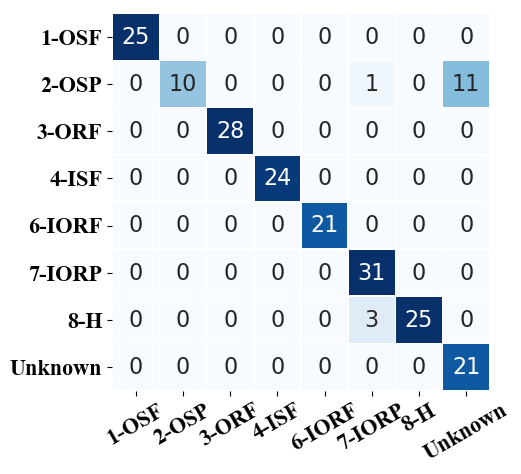

In [6]:
net_path = './models/Compared_Methods_CMU_net.pkl'
net.load_state_dict(torch.load(net_path))

True_label = []
Pred_Label = []
for (i, (im, label)) in enumerate(target_loader1):

    ss, _,  predict_prob = net.forward(im.cuda())
    
    label = np.argmax(label, axis=-1).reshape(-1, 1)
    predict_index = np.argmax(predict_prob.cpu().detach().numpy(), axis=-1).reshape(-1, 1)
    
    True_label.append(np.array(label.flatten()))
    Pred_Label.append(np.array(predict_index.flatten()))

y_true = np.array(True_label).reshape((200,))
y_pred = np.array(Pred_Label).reshape((200,))

m = confusion_matrix(y_true,y_pred)
f, ax = plt.subplots(figsize=(5,5),dpi=100)
ax= sns.heatmap(m,vmin=0, vmax=25,cmap='Blues',annot=True,fmt='',linewidths=.5,square=True,cbar=None,annot_kws={"size":16})
plt.xticks(fontsize= 16, fontfamily= "Times New Roman")                      
plt.yticks(fontsize= 16, fontfamily= "Times New Roman") 
plt.margins(0, 0)
ax.set_xticklabels(Label_Name,rotation=30)
ax.set_yticklabels(Label_Name,rotation=0)

plt.margins(0, 0)

## The accuracy

In [7]:
pred_y = []
true_y = []
NUM_CLASSES = Y_1.shape[1]
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(target_loader1):
        data, target = data.cuda(), target.cuda(non_blocking=True)
        ss, _,  predict_prob = net(data)
        pred = predict_prob.max(1, keepdim=True)[1] 
        for i in range(len(pred)):
            pred_y.append(pred[i].item())
            true_y.append(torch.argmax(target[i]).item())
a,b = utils.cal_acc(true_y, pred_y, NUM_CLASSES)
print("The accuracy on all the known classes: "+str(a))
print("The accuracy on all the target classes: "+str(b))

The accuracy on all the known classes: 0.95
The accuracy on all the target classes: 0.9441340782122905
